In [4]:
from imutils import paths
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import timeit

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.optimizers import Adam

In [5]:
print("[INFO]: Trying to Read the images")
#  Configure the Image Location
# 이미지 위치 구성하기
imagePaths = list(paths.list_images(r'C:\Users\cvpr\Documents\Bishal\Allergic Rhinitis\Dataset\non_rotate'))

[INFO]: Trying to Read the images


In [6]:
imagePaths = list(paths.list_images("Dataset/non_rotate"))
len(imagePaths)
imagePaths

['Dataset/non_rotate\\dataset0\\0\\n13_1_00002_right.tif',
 'Dataset/non_rotate\\dataset0\\0\\n13_1_00003_left.tif',
 'Dataset/non_rotate\\dataset0\\0\\n13_2_00001_right.tif',
 'Dataset/non_rotate\\dataset0\\0\\n14_1_00001_right.tif',
 'Dataset/non_rotate\\dataset0\\0\\n14_1_00007_left.tif',
 'Dataset/non_rotate\\dataset0\\0\\n15_2_00005_left.tif',
 'Dataset/non_rotate\\dataset0\\0\\n1_1_00001_right.tif',
 'Dataset/non_rotate\\dataset0\\0\\n6_1_00004_right.tif',
 'Dataset/non_rotate\\dataset0\\0\\n6_1_00006_left.tif',
 'Dataset/non_rotate\\dataset0\\1\\14_1_00002_right.tif',
 'Dataset/non_rotate\\dataset0\\1\\7_1_00001_right.tif',
 'Dataset/non_rotate\\dataset0\\1\\7_1_00005_left.tif',
 'Dataset/non_rotate\\dataset0\\2\\2_1_00002_right.tif',
 'Dataset/non_rotate\\dataset0\\2\\2_1_00005_left.tif',
 'Dataset/non_rotate\\dataset0\\2\\3_1_00003_left.tif',
 'Dataset/non_rotate\\dataset0\\2\\4_1_00002_right.tif',
 'Dataset/non_rotate\\dataset0\\2\\6_1_00001_right.tif',
 'Dataset/non_rotate\\

In [7]:
# Initialize data and labels
# 데이터 및 레이블 초기화
data = []
labels = []

In [8]:
# Formatting data and labels
for imagePath in imagePaths:
    # Extract the class label from file name and append to labels
    # 파일 이름에서 클래스 레이블을 추출하고 레이블에 추가함
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)
    # Load the image, swap color channels, and resize it to be a fixed 224x224 pixels while ignoring the aspect ratio
    # 이미지를 로드하고, 컬러 채널을 스왑하고, 가로 세로 비율을 무시하고 고정 224x224 픽셀로 크기를 조정함
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    # Append to data
    # 데이터에 추가
    data.append(image)

# Convert the data and labels to NumPy arrays while scaling the pixel intensities to the range [0,1]
# 픽셀 강도를 [0,1] 범위로 조정하면서 데이터와 레이블을 NumPy 배열로 변환
data = np.array(data) / 255.0
labels = np.array(labels)

In [9]:
labels.shape

(90,)

In [10]:
labels

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2',
       '2', '2', '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '2', '2', '2',
       '2', '2', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '2', '2', '2', '2', '2', '2'],
      dtype='<U1')

In [11]:
data.shape

(90, 224, 224, 3)

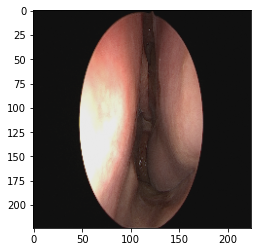

In [12]:
plt.imshow(data[1])

In [13]:
# Perform the one-hot encoding on the labels
# 레이블에 대해 원핫 인코딩 수행
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [15]:
# Initialize the training data augmentation
# 교육 데이터 억멘테이션 초기화
trainAug = ImageDataGenerator(rotation_range=40, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2,
		shear_range=0.15,fill_mode="nearest", rescale=1./255 ,horizontal_flip=True)

In [16]:
labels.shape

(90, 3)

In [17]:
# Partition the data into training and testing splits using 80% of the training data and the remaining 20% for testing
# 교육 데이터의 80%, 테스트에 20%를 사용하여 데이터를 교육 및 테스트 분할로 분할
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [18]:
# Load the network, ensuring the Head-FC layer sets are left off
# Head-FC 레이어 세트가 포함되지 않도록 네트워크를 로드한다
baseModel = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,224,3)))

In [19]:
# Construct the head model that will be placed on the top of the base model
# 보디 모델의 맨 위에 배치할 헤드 모델 구성
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.7)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [20]:
# Place the Head-FC model on top of the Base model - This become the actual model that we will train
# Head-FC 모델을 보디 모델 위에 배치한다. 이것이 우리가 교육할 실제 모델이 될 것이다.
model = Model(inputs=baseModel.input, outputs=headModel)

In [21]:
# Make sure that the basemodel layers will not be trained and only head model will be trained.
# 보디 모델 레이어가 훈련되지 않고 헤드 모델만 훈련되는지 확인한다.
for layer in baseModel.layers:
    layer.trainable = False

In [22]:
trainX.shape

(72, 224, 224, 3)

In [23]:
# Set the hyper-parameters
# 하이퍼 파라미터 설정
# INIT_LR = 1e-3
INIT_LR = 0.001
EPOCHS = 200
BS = 16

In [24]:
# Compile the Model
# 모델 컴파일
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [25]:
# Train the Network Model
# 모델 교육
print("[INFO] Model Training")
start = timeit.default_timer()
H = model.fit(
        trainAug.flow(trainX, trainY, batch_size=BS),
        steps_per_epoch=len(trainX) // BS,
        validation_data=(testX, testY),
        validation_steps=len(testX) // BS,
        epochs=EPOCHS)

[INFO] Model Training
Epoch 1/200
9/9 [==============================] - 9s 387ms/step - loss: 0.6717 - accuracy: 0.4167 - val_loss: 0.5496 - val_accuracy: 0.5000
Epoch 2/200
9/9 [==============================] - 1s 96ms/step - loss: 0.6902 - accuracy: 0.5278 - val_loss: 0.5278 - val_accuracy: 0.6111
Epoch 3/200
9/9 [==============================] - 1s 97ms/step - loss: 0.6234 - accuracy: 0.5278 - val_loss: 0.5189 - val_accuracy: 0.6667
Epoch 4/200
9/9 [==============================] - 1s 101ms/step - loss: 0.5660 - accuracy: 0.5833 - val_loss: 0.5085 - val_accuracy: 0.7778
Epoch 5/200
9/9 [==============================] - 1s 94ms/step - loss: 0.5421 - accuracy: 0.6389 - val_loss: 0.5031 - val_accuracy: 0.7778
Epoch 6/200
9/9 [==============================] - 1s 99ms/step - loss: 0.5461 - accuracy: 0.6111 - val_loss: 0.4702 - val_accuracy: 0.7778
Epoch 7/200
9/9 [==============================] - 1s 95ms/step - loss: 0.4901 - accuracy: 0.6806 - val_loss: 0.4665 - val_accuracy: 0.7

Epoch 59/200
9/9 [==============================] - 1s 95ms/step - loss: 0.3996 - accuracy: 0.7639 - val_loss: 0.4195 - val_accuracy: 0.7778
Epoch 60/200
9/9 [==============================] - 1s 94ms/step - loss: 0.3600 - accuracy: 0.8333 - val_loss: 0.4072 - val_accuracy: 0.8333
Epoch 61/200
9/9 [==============================] - 1s 93ms/step - loss: 0.3626 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7222
Epoch 62/200
9/9 [==============================] - 1s 95ms/step - loss: 0.3961 - accuracy: 0.7222 - val_loss: 0.4273 - val_accuracy: 0.8333
Epoch 63/200
9/9 [==============================] - 1s 98ms/step - loss: 0.3024 - accuracy: 0.7917 - val_loss: 0.4300 - val_accuracy: 0.8333
Epoch 64/200
9/9 [==============================] - 1s 92ms/step - loss: 0.3648 - accuracy: 0.7639 - val_loss: 0.4289 - val_accuracy: 0.8333
Epoch 65/200
9/9 [==============================] - 1s 96ms/step - loss: 0.3848 - accuracy: 0.8194 - val_loss: 0.4365 - val_accuracy: 0.8333
Epoch 66/200


Epoch 117/200
9/9 [==============================] - 1s 99ms/step - loss: 0.3176 - accuracy: 0.8056 - val_loss: 0.4569 - val_accuracy: 0.8333
Epoch 118/200
9/9 [==============================] - 1s 93ms/step - loss: 0.2261 - accuracy: 0.8889 - val_loss: 0.4386 - val_accuracy: 0.8333
Epoch 119/200
9/9 [==============================] - 1s 93ms/step - loss: 0.2921 - accuracy: 0.8333 - val_loss: 0.4144 - val_accuracy: 0.8889
Epoch 120/200
9/9 [==============================] - 1s 96ms/step - loss: 0.2704 - accuracy: 0.8333 - val_loss: 0.4347 - val_accuracy: 0.8333
Epoch 121/200
9/9 [==============================] - 1s 97ms/step - loss: 0.3212 - accuracy: 0.8194 - val_loss: 0.4446 - val_accuracy: 0.8333
Epoch 122/200
9/9 [==============================] - 1s 97ms/step - loss: 0.3089 - accuracy: 0.7917 - val_loss: 0.4241 - val_accuracy: 0.8333
Epoch 123/200
9/9 [==============================] - 1s 95ms/step - loss: 0.2659 - accuracy: 0.8472 - val_loss: 0.4150 - val_accuracy: 0.8889
Epoch 

Epoch 175/200
9/9 [==============================] - 1s 98ms/step - loss: 0.2281 - accuracy: 0.8611 - val_loss: 0.3988 - val_accuracy: 0.8889
Epoch 176/200
9/9 [==============================] - 1s 96ms/step - loss: 0.2449 - accuracy: 0.8194 - val_loss: 0.4403 - val_accuracy: 0.8333
Epoch 177/200
9/9 [==============================] - 1s 91ms/step - loss: 0.2296 - accuracy: 0.8333 - val_loss: 0.5264 - val_accuracy: 0.8333
Epoch 178/200
9/9 [==============================] - 1s 92ms/step - loss: 0.3174 - accuracy: 0.8611 - val_loss: 0.4551 - val_accuracy: 0.8333
Epoch 179/200
9/9 [==============================] - 1s 97ms/step - loss: 0.2977 - accuracy: 0.8333 - val_loss: 0.4621 - val_accuracy: 0.7778
Epoch 180/200
9/9 [==============================] - 1s 91ms/step - loss: 0.2233 - accuracy: 0.8611 - val_loss: 0.4376 - val_accuracy: 0.7778
Epoch 181/200
9/9 [==============================] - 1s 97ms/step - loss: 0.1825 - accuracy: 0.9583 - val_loss: 0.4126 - val_accuracy: 0.8889
Epoch 

In [26]:
stop = timeit.default_timer()
print('Total Training Time: ', stop - start) 

Total Training Time:  190.3445304


In [27]:
testX.shape

(18, 224, 224, 3)

In [28]:
# Make predictions on the testing set
# 테스트 세트에서 예측한다
print("Making Predictions on the Test Set")
predIdxs = model.predict(testX, batch_size=BS)

predIdxs = np.argmax(predIdxs, axis=1)
print("Classification Report")
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

Making Predictions on the Test Set
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.33      0.33      0.33         3
           2       0.80      0.67      0.73         6

    accuracy                           0.72        18
   macro avg       0.64      0.63      0.63        18
weighted avg       0.72      0.72      0.72        18



In [29]:
predIdxs

array([0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1], dtype=int64)

In [30]:
# Compute Confusion Matrix and derrive raw, accuracy, sensitivity, specificity from it
# 혼란 매트릭스
cm= confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0,0] + cm[1,1] + cm[2,2]) / total

sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
# 혼란 매트릭스 보기
print("Confusion Matrix and its Derrivatives")
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Confusion Matrix and its Derrivatives
[[8 0 1]
 [2 1 0]
 [0 2 4]]
acc: 0.7222
sensitivity: 1.0000
specificity: 0.3333


In [31]:
H.history["accuracy"]

[0.4166666567325592,
 0.5277777910232544,
 0.5277777910232544,
 0.5833333134651184,
 0.6388888955116272,
 0.6111111044883728,
 0.6805555820465088,
 0.6666666865348816,
 0.6388888955116272,
 0.6388888955116272,
 0.6527777910232544,
 0.625,
 0.7083333134651184,
 0.6944444179534912,
 0.6111111044883728,
 0.6944444179534912,
 0.6666666865348816,
 0.625,
 0.6944444179534912,
 0.75,
 0.6527777910232544,
 0.7222222089767456,
 0.6944444179534912,
 0.6666666865348816,
 0.7361111044883728,
 0.75,
 0.7222222089767456,
 0.7222222089767456,
 0.7361111044883728,
 0.7083333134651184,
 0.6805555820465088,
 0.6388888955116272,
 0.6805555820465088,
 0.6944444179534912,
 0.7083333134651184,
 0.6805555820465088,
 0.6944444179534912,
 0.6805555820465088,
 0.7083333134651184,
 0.7083333134651184,
 0.7361111044883728,
 0.7361111044883728,
 0.6944444179534912,
 0.7777777910232544,
 0.7361111044883728,
 0.8055555820465088,
 0.6805555820465088,
 0.7777777910232544,
 0.7638888955116272,
 0.8194444179534912,
 0.7

Final Plot Generated.


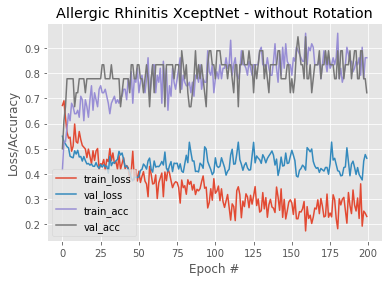

In [33]:
# plot the training loss and accuracy
# 플롯 그래프
print("Final Plot Generated.")
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Allergic Rhinitis XceptNet - without Rotation")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("[iter-3] [XCEPTN] plot-rotate")

model.output_shape # model summary representation
model.summary() # model configuration
model.get_config() # list all weight tensors in the model

print("[INFO] saving Allergic Rhinitis detector model...")
model.save("ARhinitisModel", save_format="h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)